<a href="https://colab.research.google.com/github/PavanKumarDharmoju/Electricity-Load-Prediction-Using-LSTM/blob/main/ANN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# first neural network with keras tutorial
import numpy as np
import pandas as pd
from keras.models import Sequential
from keras.layers import Dense
import tensorflow as tf
import math 
from tensorflow.keras.layers.experimental import preprocessing
import matplotlib.pyplot as plt

...

Ellipsis

In [ ]:
#To upload CSV file from device
from google.colab import files
data_to_load = files.upload()

Saving fp4.csv to fp4.csv


In [ ]:
# load data
df = pd.read_csv('fp4.csv')

In [ ]:
df = df.drop(['year','month'],axis=1)

In [ ]:
df.head()

,energy_used,mean_temp,max_temp,vapor_pressure,electricity_price,cpi
0,1957.641,17.0,0.9,4.0,2.9,36.5
1,1712.143,20.0,4.0,4.4,2.9,36.7
2,1510.079,23.2,9.0,6.4,2.8,36.9
3,1183.421,28.5,13.1,7.1,2.9,37.1
4,1006.326,30.0,19.8,9.5,2.8,37.1


In [ ]:
#Split the data into train and test
train_dataset = df.sample(frac=0.8, random_state=0)
test_dataset = df.drop(train_dataset.index)

In [ ]:
#Look at the overall statistics, to see how each feature covers a very different range:
train_dataset.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
energy_used,403.0,1521.400521,401.375481,901.7,1200.7025,1453.616,1775.467,2808.419
mean_temp,403.0,23.993300,4.113209,15.8,20.0000,25.500,27.050,30.200
max_temp,403.0,15.388586,9.140703,0.1,6.7500,15.800,24.450,29.100
vapor_pressure,403.0,9.465509,4.514485,3.1,5.3000,8.200,13.750,18.100
electricity_price,403.0,7.888362,2.518321,2.6,6.7150,8.060,8.975,13.090
cpi,403.0,123.039623,45.347547,36.5,99.4000,124.000,142.900,217.930


In [ ]:
#Split features from labels

train_features = train_dataset.copy()
test_features = test_dataset.copy()

train_labels = train_features.pop('energy_used')
test_labels = test_features.pop('energy_used')

In [ ]:
#The Normalization layer
normalizer = preprocessing.Normalization()
#Then .adapt() it to the data:
normalizer.adapt(np.array(train_features))
#calculates the mean and variance, and stores them in the layer
print(normalizer.mean.numpy())

[ 23.9933     15.388586    9.465508    7.8883624 123.03962  ]


In [ ]:
#When the layer is called it returns the input data, with each feature independently normalized
first = np.array(train_features[:1])

with np.printoptions(precision=2, suppress=True):
  print('First example:', first)
  print()
  print('Normalized:', normalizer(first).numpy())

First example: [[26.5 29.  16.8  5.7 80. ]]

Normalized: [[ 0.61  1.49  1.63 -0.87 -0.95]]


In [ ]:
# define the keras model
model = Sequential()
model.add(Dense(12, input_dim=5, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [ ]:
#Once the model is built, configure the training procedure using the Model.compile() method
model.compile(
    optimizer=tf.optimizers.Adam(learning_rate=2),
    loss='mean_squared_error')


In [ ]:
#Once the training is configured, use Model.fit() to execute the training:
%%time
history = model.fit(
    train_features, train_labels,validation_split=0.2, 
    epochs=41,batch_size=36,
    # suppress logging
    verbose=0)
print(history)

CPU times: user 3.07 s, sys: 147 ms, total: 3.22 s
Wall time: 3.31 s


In [ ]:
def plot_loss(history):
  plt.plot(history.history['loss'], label='loss')
  plt.xlabel('Epoch')
  plt.ylabel('Error [energy_used]')
  plt.legend()
  plt.grid(True)

In [ ]:
def plot_val_loss(history):
  plt.plot(history.history['val_loss'], label='val_loss')
  plt.xlabel('Epoch')
  plt.ylabel('Error [energy_used]')
  plt.legend()
  plt.grid(True)

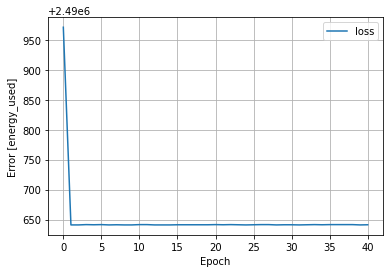

In [ ]:
plot_loss(history)


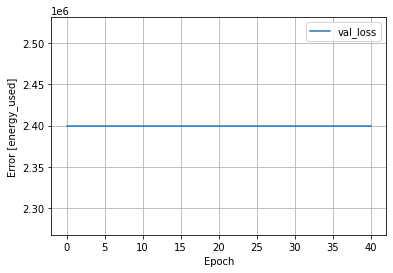

In [ ]:
plot_val_loss(history)

In [ ]:
#Collect the results on the test set, for later:
test_results = {}

test_results['mse'] = model.evaluate(
    test_features, test_labels, verbose=0)

test_results['rmse'] = np.sqrt(test_results['mse'])

In [ ]:
pd.DataFrame(test_results, index=['Error']).T

,Error
mse,2.507050e+06
rmse,1.583367e+03
